<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Practice_Support_Vector_Machine_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This content is taken directly from the Tutorial session of the TEQIP III sponsored Faculty Development program, conducted by IIT Ghandinagar, during 11 to 23 January, 2021

# Support Vector Machince (SVM) lab tutorial

Support vector machine is a simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in **classification objectives**.

The objective of the support vector machine algorithm is to find a **hyperplane** in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![](https://miro.medium.com/max/770/1*ZpkLQf2FNfzfH4HXeMw4MQ.png)

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

>taken from https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47


# Lets try to implement SVM using the scikit learn module

> inspired by https://www.kaggle.com/babakgohardani/breast-cancer-classification-svm

importing some few important libraries

In [ ]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Loading the data using pandas

In [ ]:
!wget https://raw.githubusercontent.com/varunjain3/datasets/main/Breast_cancer_data.csv -q

In [ ]:
data = pd.read_csv("/content/Breast_cancer_data.csv")
data.head(10)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [ ]:
# describing the dataset
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
# Dividing the data into X and y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X.shape , y.shape

((569, 5), (569,))

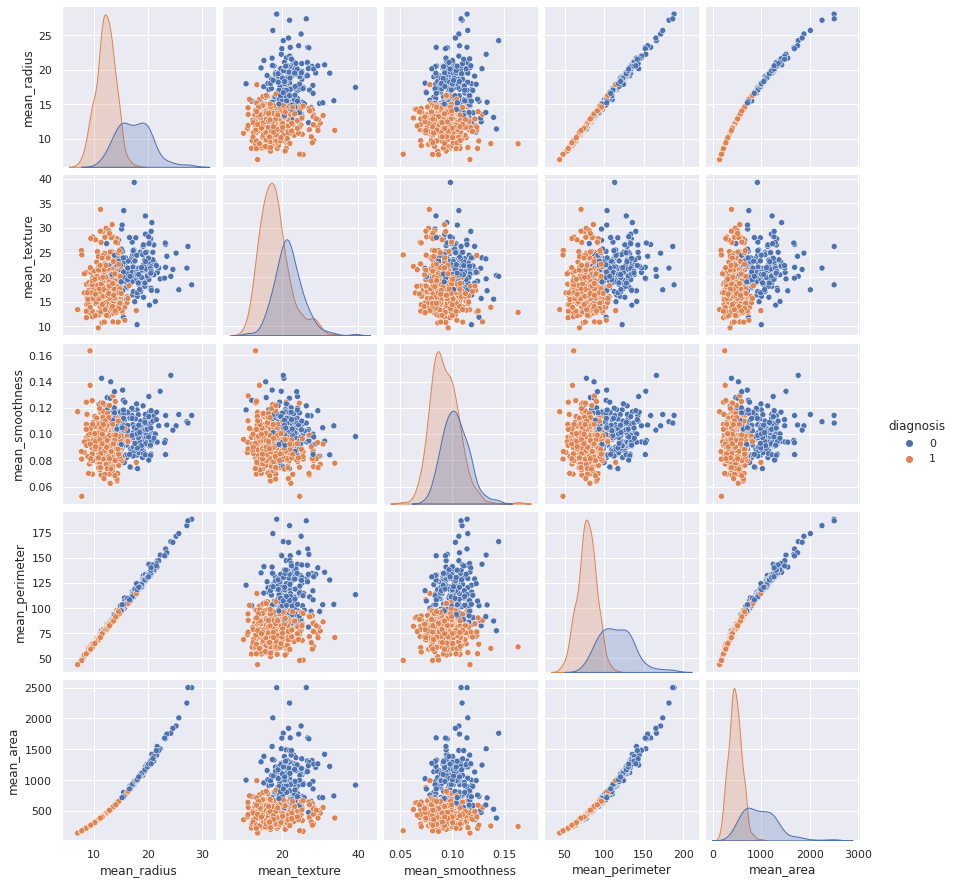

In [ ]:
import seaborn as sns
# Visualising the dataset
sns.set(rc={'figure.figsize':(10,5)})
sns.pairplot(data, hue='diagnosis', vars = ["mean_radius", "mean_texture", "mean_smoothness", "mean_perimeter", "mean_area", ])

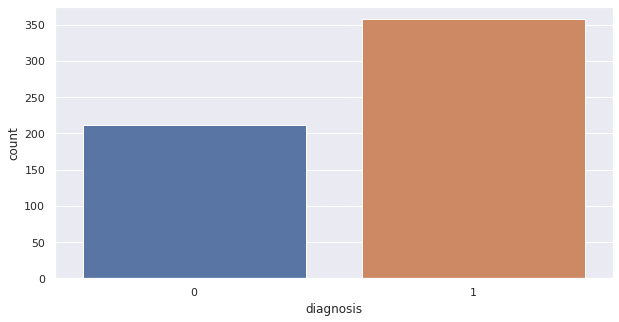

In [ ]:
# Checking the count for each class
sns.countplot(x=data['diagnosis'])

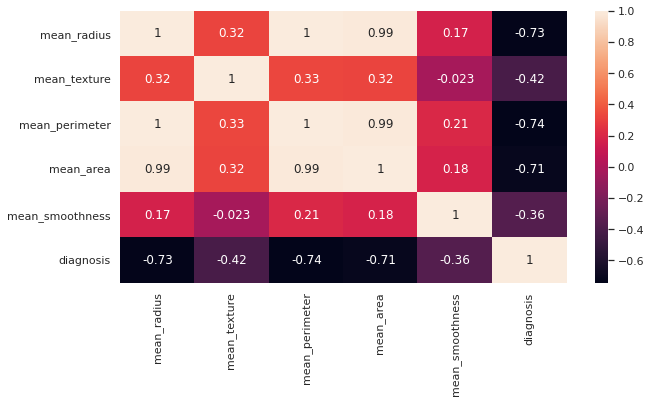

In [ ]:
# Finding the correlations between various features
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot= True)

In [ ]:
# Lets split our data into a test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 5), (114, 5), (455,), (114,))

In [ ]:
# Normalizing the Features
from sklearn.preprocessing import normalize
X_norm_train = normalize(X_train)
X_norm_test = normalize(X_test)

print("Max - Min of orignal features\n",np.max(X_train,axis = 0),"\n",np.min(X_train,axis = 0))
print("\Max - Min of normalized features\n",np.max(X_norm_train,axis = 0),"\n",np.min(X_norm_train,axis = 0))

Max - Min of orignal features
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01] 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02]
\Max - Min of normalized features
 [4.62948471e-02 1.42038109e-01 2.90395553e-01 9.97105059e-01
 7.75891292e-04] 
 [1.09318755e-02 7.36935578e-03 7.45137687e-02 9.51387332e-01
 4.32171885e-05]


In [ ]:
from sklearn.svm import SVC #Read more at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Creating an object of the Support Vector Classifier
classifier = SVC(kernel="rbf",probability=True)

# Fitting the data to the classifier
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the values for test set
y_hat = classifier.predict(X_test)

y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

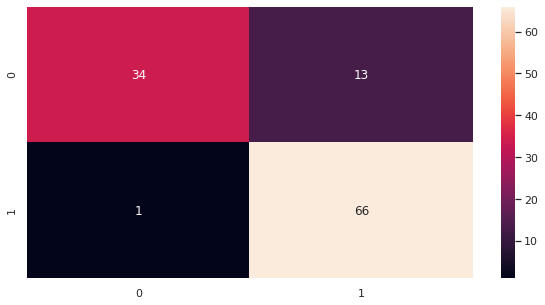

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Visualising the heatmap
sns.heatmap(cm, annot= True)

In [ ]:
# Going a step further to calculate the metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.84      0.99      0.90        67

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



## Plotting the ROC curve

> read more at https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a

A more visual way to measure the performance of a binary classifier is the receiver operating characteristic (ROC) curve. It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR)

In [ ]:
y_hat_prob = classifier.predict_proba(X_test)[:,1]

y_hat_prob

array([0.85143831, 0.87015597, 0.77768079, 0.71721251, 0.88387919,
       0.92869608, 0.91952636, 0.92610113, 0.85846732, 0.92503639,
       0.6534479 , 0.6320401 , 0.91052598, 0.05939005, 0.66622318,
       0.3731645 , 0.90095354, 0.00207951, 0.00251964, 0.00231292,
       0.92197502, 0.16472116, 0.86460173, 0.92461268, 0.00250345,
       0.92283249, 0.92975437, 0.82151956, 0.85791546, 0.00427555,
       0.89549726, 0.00212535, 0.87193447, 0.15459658, 0.9180976 ,
       0.89874197, 0.86426373, 0.00308301, 0.59912556, 0.43968799,
       0.42738874, 0.89990578, 0.18177235, 0.92542113, 0.86636431,
       0.0038117 , 0.89306846, 0.78123192, 0.92470851, 0.64167949,
       0.0033306 , 0.60017294, 0.004966  , 0.92699012, 0.91251282,
       0.92833543, 0.92731569, 0.91306357, 0.91699533, 0.00407236,
       0.80609166, 0.13995601, 0.92959715, 0.89252799, 0.01400938,
       0.91821384, 0.00451079, 0.03109986, 0.00202591, 0.9108265 ,
       0.6959411 , 0.17854222, 0.92811934, 0.62611198, 0.00493

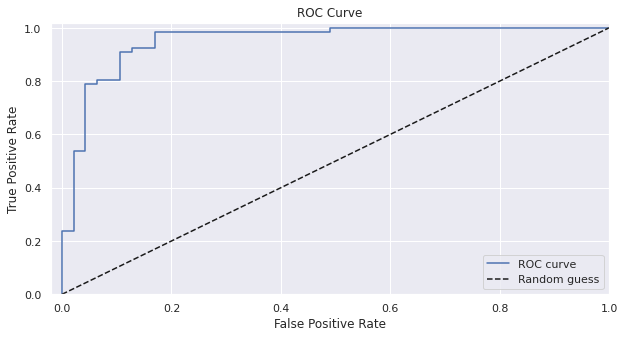

In [ ]:
# Plotting the curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_hat_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

To understand this plot, let’s analyse it in steps.
1.   Suppose we take the threshold to be 0, that is, all cases are classified as 1. On the one hand, this implies that no 1s are predicted as real 0s and so there are no false negatives — the true positive rate (or recall) is 1. On the other hand, this also means that all 0 are classified as 1s, and thus there are no true negatives — the false positive rate is also 1. This corresponds to the top-right part of the curve.
2.   Now suppose that the threshold is 1, that is, no case is classified as 1. Then, there are no true positives (and thus the true positive rate is 0) and no false positives (and thus the false positive rate is 0). This corresponds to the bottom-left of the curve.
3. The rest of the curve corresponds to values of the threshold between 0 and 1, from the top-right to the bottom-left. As you can see, the curve approaches (but does not reach) the corner of the plot where the TP rate is 1 and the FP rate is 0 — that is, no 1s cases are classified as 0s and no 0s are classified as 1s. This is the point of **perfect classification**.
4. If we are closer to the diagonal line, that means that the proportion of cases predicted as 1s which turn out to be actual 1s is roughly the same as the proportion of 0s which are predicted as 1s. This is as good as random guessing, and a classifier with this performance would be pretty terrible.

## Area under the ROC curve
The above points suggest that the area under the ROC curve (usually denoted by AUC) is a good measure of the performance of the classification algorithm. If it is near 0.5, the classifier is not much better than random guessing, whereas it gets better as the area gets close to 1.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_hat_prob)

0.9514131470308035

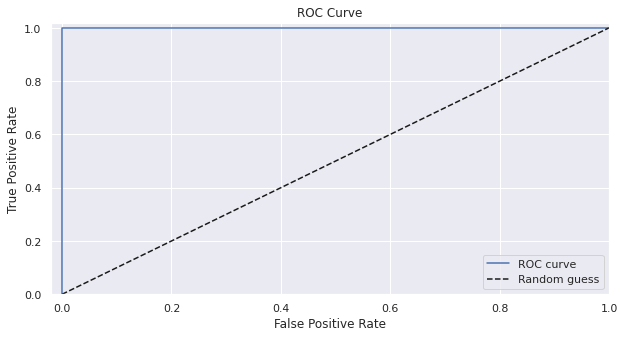

0.9514131470308035

In [ ]:
from sklearn.datasets import load_breast_cancer


from sklearn.svm import SVC
model=SVC(kernel='rbf', probability=True)
model.fit(X_train,y_train)
y_hat=model.predict(X_test)
y_hat_prob=model.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr,tpr,threholds=roc_curve(y_hat,y_hat_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_hat_prob)

In [ ]:
import numpy  as np
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

our_x=pd.series([1,2,3,4,5,6,7,8,9,10,11,12])
N=len(our_x)
our_x=our_x.reshape(N,1)
our_y=pd.series([0,0,1,0,1,0,1,0,1,1,1,1])

ourx_train,ourx_test,oury_train, oury_test = train_test_split(our_x,our_y,test_size=0.9)

#sns.countplot(our_y)
#plt.show()

model=SVC(kernel='linear',probability=True)
#model.fit(X_train,y_train)

print(ourx_train)


AttributeError: ignored

## Homework Task

The task is to use the various kernels that we have for the SVC classifier.
You should try to find which kernel is the best when used to classify our dataset.

You should try the following kernels - 
1. rbf (Already done for you)
2. linear
3. poly
4. sigmoid

Determine which kernel works out the best and what AUC measure are we able to find.


**Hint:** You may want to read the documentation for the SVC classifier to figure out how you can use different kernels. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

